In [ ]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from utils import normal_distance_eval
from mpl_toolkits import mplot3d

def rfilter(row):
    return abs(row['X1']) < 6 and abs(row['Y1']) < 6 and abs(row['Z1']) < 6 and abs(row['X2']) < 6 and abs(row['Y2']) < 6 and abs(row['Z2']) < 6 and \
abs(row['X3']) < 6 and abs(row['Y3']) < 6 and abs(row['Z3']) < 6

files = ['ft1cap.csv', 'ft2cap.csv', 'rg1cap.csv', 'rg2cap.csv']
robot_zs = [['Z1', 'Z2'], ['Z2', 'Z3'], ['Z1', 'Z2'],  ['Z2', 'Z3']]
robot_ys = [['Y1', 'Y2'], ['Y2', 'Y3'], ['Y1', 'Y2'],  ['Y2', 'Y3']]
robot_xs = [['X1', 'X2'], ['X2', 'X3'], ['X1', 'X2'],  ['X2', 'X3']]
subject_z = ['Z3', 'Z1', 'Z3', 'Z1']
subject_y = ['Y3', 'Y1', 'Y3', 'Y1']
subject_x = ['X3', 'X1', 'X3', 'X1']

## Leader path

In [ ]:
for i, f in enumerate(files):
    plt.clf()
    data = pd.read_csv(files[i], sep = ';') 
    data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
    data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
    m = data.apply(rfilter, axis=1)
    data = data[m]
    plt.xlabel('x position [m]')
    plt.ylabel('y position [m]')
    plt.ylim(-1.2, 1.2)
    plt.xlim(-2.2, 2.2)
    plt.plot(data[subject_z[i]], data[subject_x[i]], label='leader', color='g')
    plt.plot(data['robot_z'], data['robot_x'], label='robot', color='navy', linestyle='--')
    plt.legend()
    plt.savefig(f + '.eps', format='eps')
    plt.show()

## Normal distance from path

<IPython.core.display.Javascript object>


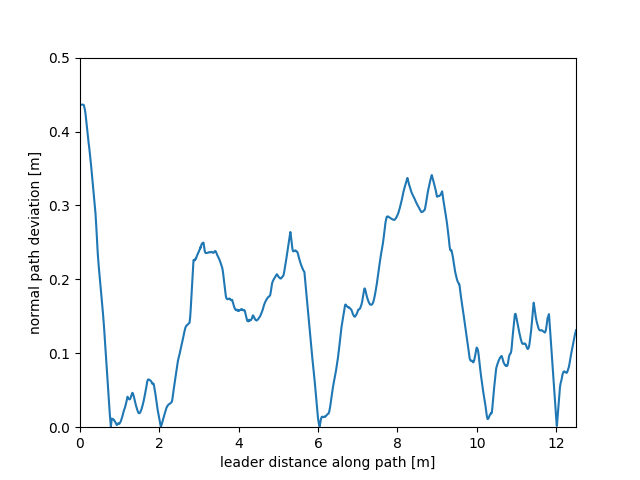

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Total distance to leader: 1073.44583924
Total distance to leader: 1286.53805275
Total distance to leader: 1034.45276809
Total distance to leader: 823.677070237


In [11]:
i = 0
for i, f in enumerate(files):
    plt.clf()
    data = pd.read_csv(files[i], sep = ';') 
    data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
    data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
    m = data.apply(rfilter, axis=1)

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data[subject_z[i]])
    lx = np.array(data[subject_x[i]])
    leader_coords = np.array(list(zip(lz, lx)))

    leader_path_cum_length = [0]

    for i in range(1, len(leader_coords)):
        dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
        leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)

    robot_dist_to_leader_path, distance_score = normal_distance_eval(robot_coords, leader_coords)

    plt.plot(leader_path_cum_length, robot_dist_to_leader_path)
    plt.ylabel('normal path deviation [m]')
    plt.xlabel('leader distance along path [m]')
    plt.xlim((0, 12.5))
    plt.ylim((0, 0.5))
    plt.legend()
    print('Total distance to leader:', distance_score)
    plt.show()
    plt.savefig(f + '_npd.eps', format='eps')

## 3D plot

In [ ]:
i = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = pd.read_csv(files[i], sep = ';') 
data['robot_z'] = (data[robot_zs[i][0]] + data[robot_zs[i][1]]) / 2
data['robot_y'] = (data[robot_ys[i][0]] + data[robot_ys[i][1]]) / 2
data['robot_x'] = (data[robot_xs[i][0]] + data[robot_xs[i][1]]) / 2
m = data.apply(rfilter, axis=1)
data = data[m]
# plt.xlabel('x position [m]')
# plt.ylabel('y position [m]')
# plt.zlabel('z position [m]')
ax.plot(data[subject_z[i]], data[subject_x[i]], data[subject_y[i]], label='leader', color='g')
ax.set_zlim((0,1))
plt.plot(data['robot_z'], data['robot_x'], data['robot_y'], label='robot', color='navy', linestyle='--')
plt.legend()